In [76]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np

In [24]:
clinical_attributes = pd.read_csv('step_04/clinical_attributes.csv')
z_score = pd.read_csv('step_04/z_score.csv')
mutation = pd.read_csv('step_04/mutation.csv')
response = pd.read_csv('step_04/response.csv')

In [25]:
response

,overall_survival
0,1
1,0
2,1
3,1
4,1
...,...
1177,0
1178,1
1179,1
1180,0


## Separación en ( train (80) + val (20) )[90] + test [10]

In [26]:
seed = 255

In [40]:
X_clinical_train_val, X_clinical_test, y_train_val, y_test = train_test_split(clinical_attributes, response, test_size=0.1, random_state=seed)
X_clinical_train, X_clinical_val, y_train, y_val = train_test_split(X_clinical_train_val, y_train_val, test_size=0.2, random_state=seed)

X_mutation_train_val, X_mutation_test, _, _ = train_test_split(mutation, response, test_size=0.1, random_state=seed)
X_mutation_train, X_mutation_val, _, _ = train_test_split(X_mutation_train_val, y_train_val, test_size=0.2, random_state=seed)

X_z_score_train_val, X_z_score_test, _, _ = train_test_split(z_score, response, test_size=0.1, random_state=seed)
X_z_score_train, X_z_score_val, _, _ = train_test_split(X_z_score_train_val, y_train_val, test_size=0.2, random_state=seed)

# Model testing

In [30]:
from joblib import dump

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

## KNN

In [79]:
hyperparameters = [
    ("n_neighbors_values", [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101]),
    #("weights_values",['uniform', 'distance']),
    ("p_values", [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
]

In [80]:
metrics = []
for hyperparameter, values in hyperparameters:
    for value in values:
        if hyperparameter == "n_neighbors_values":
            model = KNeighborsClassifier(n_neighbors=value)
        elif hyperparameter == "weights_values":
            model = KNeighborsClassifier(weights=value)
        elif hyperparameter == "p_values":
            model = KNeighborsClassifier(p=value)

            
        model.fit(X_clinical_train, y_train)
            
        y_pred = model.predict(X_clinical_val)
            
        accuracy_val = accuracy_score(y_val, y_pred)
        precision_val = precision_score(y_val, y_pred, average='weighted')
        recall_val = recall_score(y_val, y_pred, average='weighted')
        f1_val = f1_score(y_val, y_pred, average='weighted')
            

        y_pred = model.predict(X_clinical_test)

        accuracy_test = accuracy_score(y_test, y_pred)
        precision_test = precision_score(y_test, y_pred, average='weighted')
        recall_test = recall_score(y_test, y_pred, average='weighted')
        f1_test = f1_score(y_test, y_pred, average='weighted')
        
        metrics.append([hyperparameter, value, accuracy_val, precision_val, recall_val, f1_val, accuracy_test, precision_test, recall_test, f1_test])

df = pd.DataFrame(metrics, columns=['hyperparameter', 'value', 'accuracy_val', 'precision_val', 'recall_val', 'f1_val', 'accuracy_test', 'precision_test', 'recall_test', 'f1_test']).sort_values(by='f1_test', ascending=False)
df

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarnin

,hyperparameter,value,accuracy_val,precision_val,recall_val,f1_val,accuracy_test,precision_test,recall_test,f1_test
17,n_neighbors_values,67,0.563380,0.560819,0.563380,0.561094,0.655462,0.657781,0.655462,0.655462
14,n_neighbors_values,53,0.568075,0.566860,0.568075,0.567268,0.655462,0.661278,0.655462,0.654585
5,n_neighbors_values,17,0.600939,0.599246,0.600939,0.599442,0.655462,0.663618,0.655462,0.653852
20,n_neighbors_values,79,0.600939,0.598649,0.600939,0.598182,0.647059,0.653812,0.647059,0.645810
24,n_neighbors_values,101,0.610329,0.608085,0.610329,0.606911,0.638655,0.640914,0.638655,0.638655
21,n_neighbors_values,83,0.605634,0.603344,0.605634,0.602552,0.638655,0.642382,0.638655,0.638298
23,n_neighbors_values,97,0.596244,0.593551,0.596244,0.592298,0.638655,0.642382,0.638655,0.638298
19,n_neighbors_values,73,0.577465,0.576291,0.577465,0.576675,0.638655,0.646359,0.638655,0.636967
16,n_neighbors_values,61,0.582160,0.579503,0.582160,0.579273,0.638655,0.646359,0.638655,0.636967
8,n_neighbors_values,29,0.586854,0.585723,0.586854,0.586082,0.638655,0.648911,0.638655,0.635990


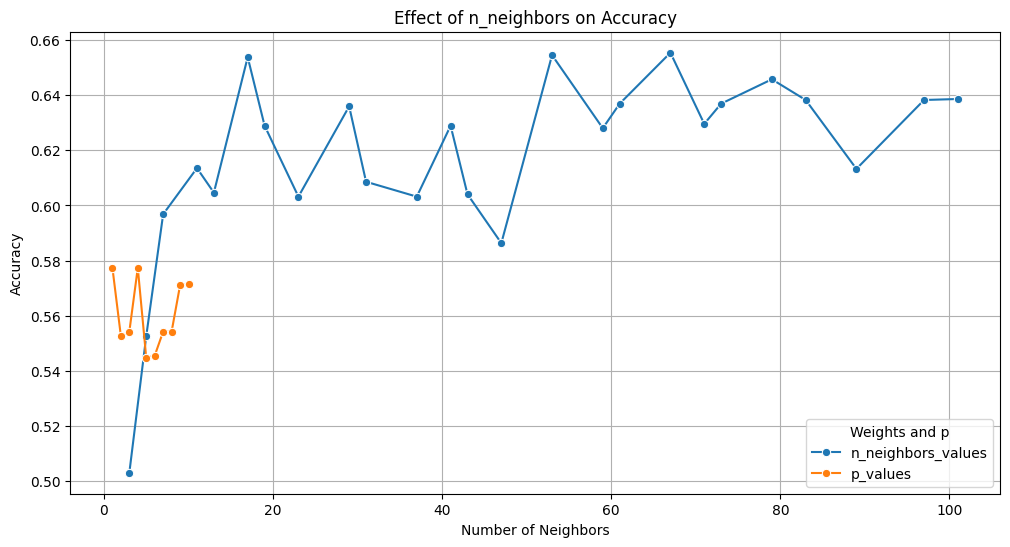

In [82]:
plt.figure(figsize=(12, 6))
for hyperparameter in df['hyperparameter'].unique():
    sns.lineplot(data=df[df['hyperparameter'] == hyperparameter], x='value', y='f1_test', label=hyperparameter, marker='o')
#sns.lineplot(data=df, x='value', y='accuracy_val', hue="hyperparameter", markers=True)
plt.title('Effect of n_neighbors on Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(title='Weights and p')
plt.show()

## General

In [48]:
class Models():
    algorithms = [
        ("knn", KNeighborsClassifier()),
        ("dt", DecisionTreeClassifier()),
        ("svm", SVC()),
        ("rf", RandomForestClassifier()),
        ("ada", AdaBoostClassifier()) 
    ]
    
    def train_all(self, data, response):
        for name, algorithm in self.algorithms:
            algorithm.fit(X=data, y=response)

    def save(self, sufix):
        for name, algorithm in self.algorithms:
            dump(algorithm, f"models/{name}_model_{sufix}.joblib")

    def predict(self, X_val):
        predictions = []

        for name, model in self.algorithms:
            predictions.append((name, model.predict(X_val)))
        
        return predictions
    
    def cross_validate(self, X, y, cv):
        return pd.DataFrame(
            [[self.scaler, 
             self.algorithm, 
             cross_val_score(self.model_instance, X, y, cv=cv).mean()
            ]], columns=["scaler", "algorithm", "cv"]
        )

    def cv_predict(self, X, y, cv):
        self.predictions = cross_val_predict(self.model_instance, X, y, cv=cv)
        return self.get_metrics(y)

    def get_metrics(self, X_val,y_true):
        export_list = []
        predictions = self.predict(X_val)
        for name, y_pred in predictions:
            acc_value = accuracy_score(y_pred=y_pred, y_true=y_true) 
            recall_value = recall_score(y_pred=y_pred, y_true=y_true)
            precision_value = precision_score(y_pred=y_pred, y_true=y_true) 
            f1_value = f1_score(y_pred=y_pred, y_true=y_true)
            mcc_value = matthews_corrcoef(y_pred=y_pred, y_true=y_true)
            cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
            export_list.append((name, acc_value, recall_value, precision_value, f1_value, mcc_value, cm))
    
        return pd.DataFrame(export_list, columns=["algorithm", "acc", "recall", "precision", "f1", "mcc", "cm"])

In [49]:
model_instance = Models()
model_instance.train_all(X_clinical_train, y_train)
model_instance.get_metrics(X_clinical_val, y_val)

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc,recall,precision,f1,mcc,cm
0,knn,0.610329,0.540816,0.582418,0.560847,0.211967,"[[77, 38], [45, 53]]"
1,dt,0.563380,0.581633,0.522936,0.550725,0.129081,"[[63, 52], [41, 57]]"
2,svm,0.629108,0.602041,0.595960,0.598985,0.254034,"[[75, 40], [39, 59]]"
3,rf,0.643192,0.622449,0.610000,0.616162,0.282942,"[[76, 39], [37, 61]]"
4,ada,0.643192,0.642857,0.605769,0.623762,0.285501,"[[74, 41], [35, 63]]"


In [51]:
model_instance = Models()
model_instance.train_all(X_z_score_train, y_train)
model_instance.get_metrics(X_z_score_val, y_val)

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc,recall,precision,f1,mcc,cm
0,knn,0.624413,0.642857,0.583333,0.611650,0.250775,"[[70, 45], [35, 63]]"
1,dt,0.516432,0.540816,0.477477,0.507177,0.036385,"[[57, 58], [45, 53]]"
2,svm,0.657277,0.653061,0.621359,0.636816,0.313098,"[[76, 39], [34, 64]]"
3,rf,0.600939,0.612245,0.560748,0.585366,0.202902,"[[68, 47], [38, 60]]"
4,ada,0.582160,0.581633,0.542857,0.561576,0.163734,"[[67, 48], [41, 57]]"


In [52]:
model_instance = Models()
model_instance.train_all(X_mutation_train, y_train)
model_instance.get_metrics(X_mutation_val, y_val)

/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/diego/miniconda3/envs/pandas-env/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A

,algorithm,acc,recall,precision,f1,mcc,cm
0,knn,0.427230,0.530612,0.406250,0.460177,-0.132571,"[[39, 76], [46, 52]]"
1,dt,0.553991,0.571429,0.513761,0.541063,0.110237,"[[62, 53], [42, 56]]"
2,svm,0.577465,0.642857,0.533898,0.583333,0.165036,"[[60, 55], [35, 63]]"
3,rf,0.539906,0.612245,0.500000,0.550459,0.090951,"[[55, 60], [38, 60]]"
4,ada,0.572770,0.612245,0.530973,0.568720,0.151174,"[[62, 53], [38, 60]]"


In [39]:
# Perform cross-validation on the RandomForestClassifier
rf_model = model_instance.rf_model
cv_scores = cross_val_score(rf_model, df, response.values.ravel(), cv=5)

# Print the cross-validation scores
print("Cross-validation scores for RandomForestClassifier:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Analyze feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 important features:")
print(importance_df.head(10))

TypeError: 'Models' object is not subscriptable